<a href="https://colab.research.google.com/github/mihad30/Machine-learning-Project-222-115-043/blob/main/Viral_Social_Media_Trends_%26_Engagement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/ColabDataset/media.csv')
print(df.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              Views          Likes        Shares      Comments
count  5.000000e+03    5000.000000   5000.000000   5000.000000
mean   2.494066e+06  251475.029800  50519.562000  24888.393800
std    1.459490e+06  144349.583384  29066.362671  14284.504319
min    1.266000e+03     490.000000     52.000000     18.000000
25%    1.186207e+06  126892.250000  25029.000000  12305.250000
50%    2.497373e+06  249443.000000  50839.500000  25004.000000
75%    3.759781e+06  373970.750000  75774.250000  37072.750000
max    4.999430e+06  499922.000000  99978.000000  49993.000000


In [ ]:
df

,Views,Likes,Shares,Comments
0,4163464,339431,53135,19346
1,4155940,215240,65860,27239
2,3666211,327143,39423,36223
3,917951,127125,11687,36806
4,64866,171361,69581,6376
...,...,...,...,...
4995,4258236,381509,59209,4674
4996,4841525,166266,54841,4832
4997,2004080,32401,75229,33875
4998,2221665,46996,12954,42832


from matplotlib import pyplot as plt
df['Views'].plot(kind='hist', bins=20, title='Views')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Likes'].plot(kind='hist', bins=20, title='Likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Shares'].plot(kind='hist', bins=20, title='Shares')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Comments'].plot(kind='hist', bins=20, title='Comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Views', y='Likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Likes', y='Shares', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Shares', y='Comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Views'].plot(kind='line', figsize=(8, 4), title='Views')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Likes'].plot(kind='line', figsize=(8, 4), title='Likes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Shares'].plot(kind='line', figsize=(8, 4), title='Shares')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Comments'].plot(kind='line', figsize=(8, 4), title='Comments')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print(df.head())


     Views   Likes  Shares  Comments
0  4163464  339431   53135     19346
1  4155940  215240   65860     27239
2  3666211  327143   39423     36223
3   917951  127125   11687     36806
4    64866  171361   69581      6376


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB
None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Views     5000 non-null   int64
 1   Likes     5000 non-null   int64
 2   Shares    5000 non-null   int64
 3   Comments  5000 non-null   int64
dtypes: int64(4)
memory usage: 156.4 KB


In [ ]:
df.describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


In [ ]:
df.dropna(inplace=True)

Task 1. Exploratory Data Analysis (EDA).

In [ ]:
sns.set_style("darkgrid")

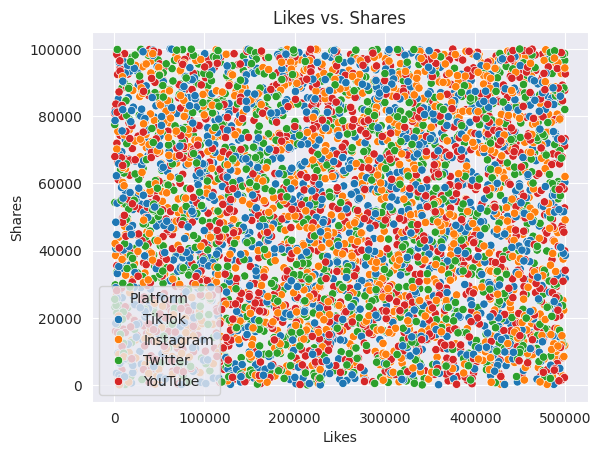

In [ ]:
# Scatter plot: Likes vs. Shares
sns.scatterplot(x='Likes', y='Shares', data=df, hue='Platform')
plt.title('Likes vs. Shares')
plt.show()

Histogram


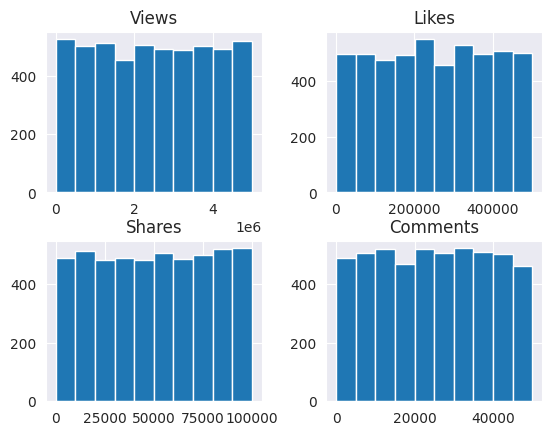

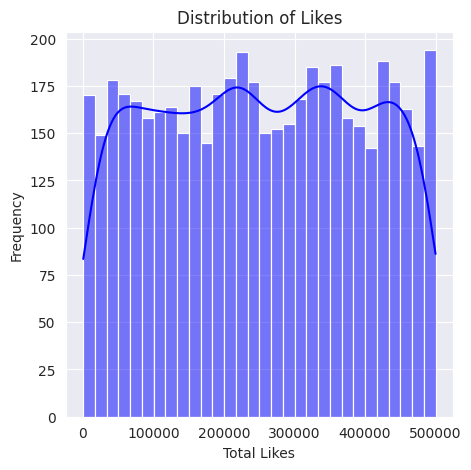

In [ ]:
#Histogram
print("Histogram")
df.hist()
plt.show()

#Histogram of Likes
plt.figure(figsize=(5, 5))
sns.histplot(df["Likes"], bins=30, kde=True, color="blue")
plt.title("Distribution of Likes")
plt.xlabel("Total Likes")
plt.ylabel("Frequency")
plt.show()



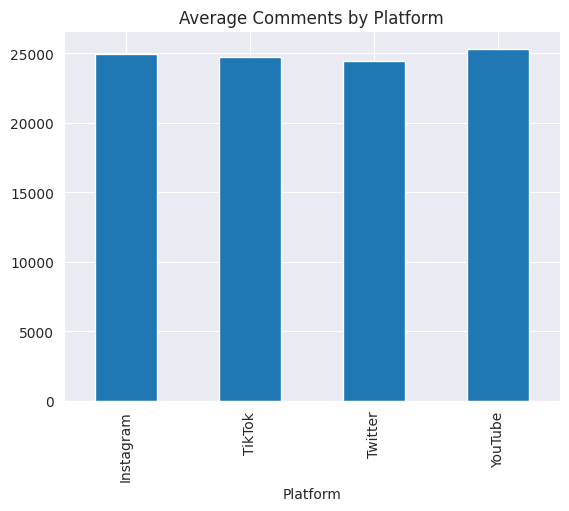

In [ ]:
#Bar Chart
df.groupby('Platform')['Comments'].mean().plot(kind='bar')
plt.title('Average Comments by Platform')
plt.show()

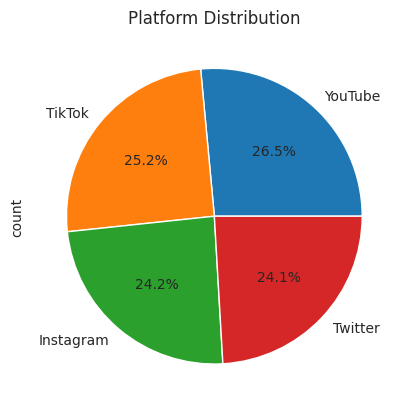

In [ ]:
# Pie chart for 'Platform' distribution
df['Platform'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Platform Distribution')
plt.show()

     Views   Likes  Shares  Comments
0  4163464  339431   53135     19346
1  4155940  215240   65860     27239
2  3666211  327143   39423     36223
3   917951  127125   11687     36806
4    64866  171361   69581      6376
Correlation to 1
             Views     Likes    Shares  Comments
Views     1.000000 -0.003177  0.013144 -0.009956
Likes    -0.003177  1.000000  0.011154 -0.011772
Shares    0.013144  0.011154  1.000000 -0.000132
Comments -0.009956 -0.011772 -0.000132  1.000000


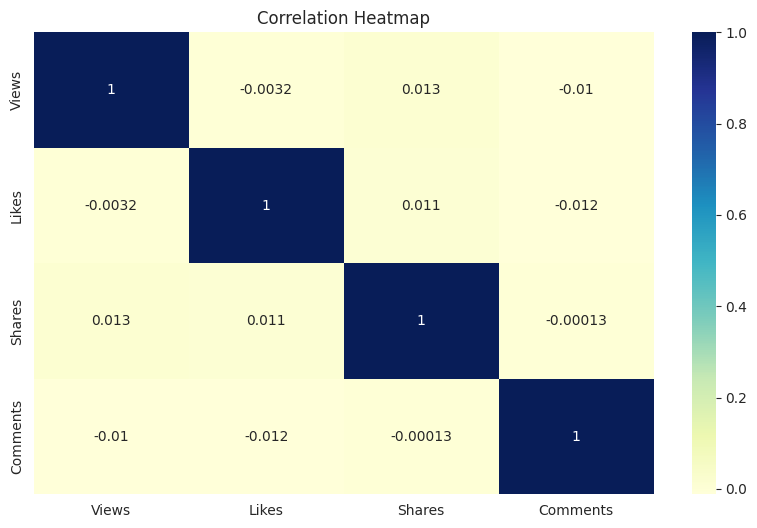

In [ ]:
# Heatmap for correlation matrix
print(df.head())
df = df.select_dtypes(include=['float64', 'int64'])

#coorelation matrix
print("Correlation to 1")
print(df.corr())

#Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


Univariate

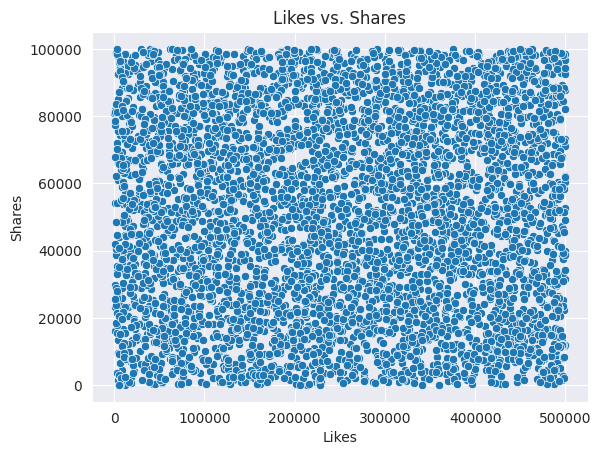

Histogram


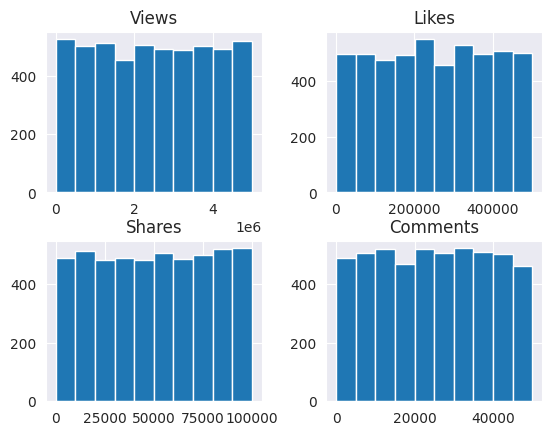

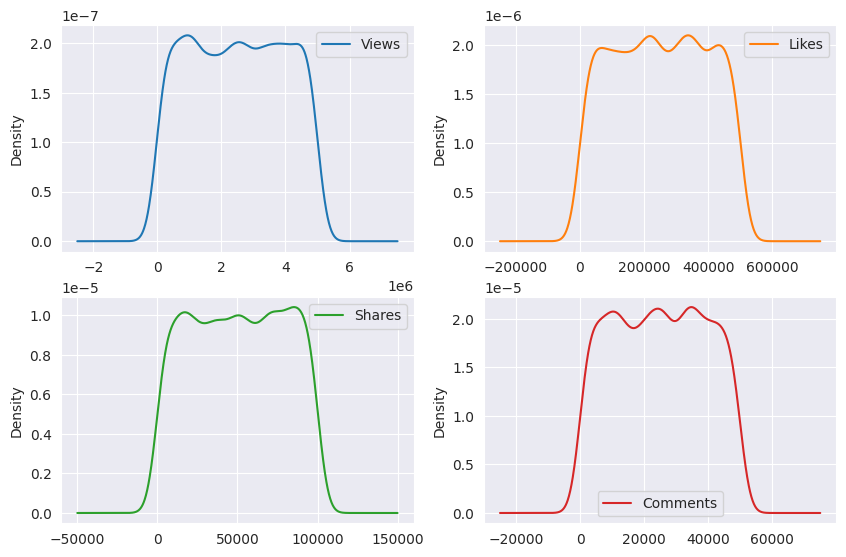

     Views   Likes  Shares  Comments
0  4163464  339431   53135     19346
1  4155940  215240   65860     27239
2  3666211  327143   39423     36223
3   917951  127125   11687     36806
4    64866  171361   69581      6376
             Views     Likes    Shares  Comments
Views     1.000000 -0.003177  0.013144 -0.009956
Likes    -0.003177  1.000000  0.011154 -0.011772
Shares    0.013144  0.011154  1.000000 -0.000132
Comments -0.009956 -0.011772 -0.000132  1.000000


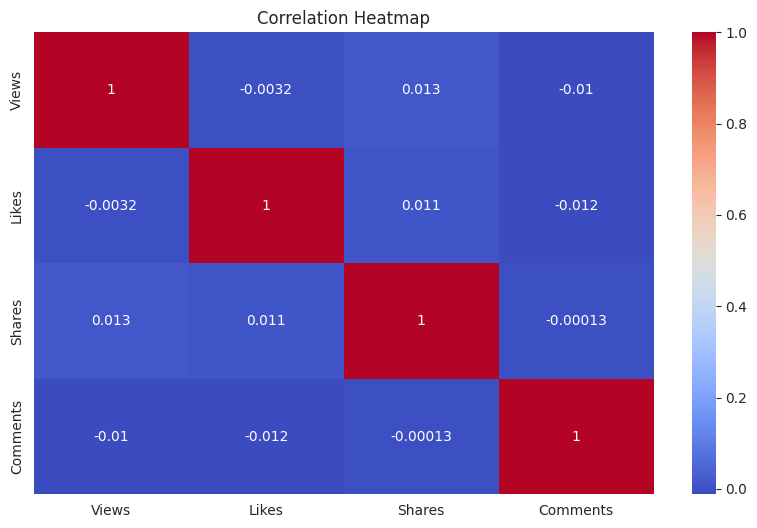

In [ ]:
sns.set_style("darkgrid")

# Scatter plot: Likes vs. Shares
sns.scatterplot(x='Likes', y='Shares', data=df)
plt.title('Likes vs. Shares')
plt.show()

#Histogram
print("Histogram")
df.hist()
plt.show()

#Density Plot
features = ['Views', 'Likes', 'Shares', 'Comments']
df[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));
plt.show()

# Heatmap for correlation matrix
print(df.head())
df = df.select_dtypes(include=['float64', 'int64'])
print(df.corr())
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Bivariate Analysis

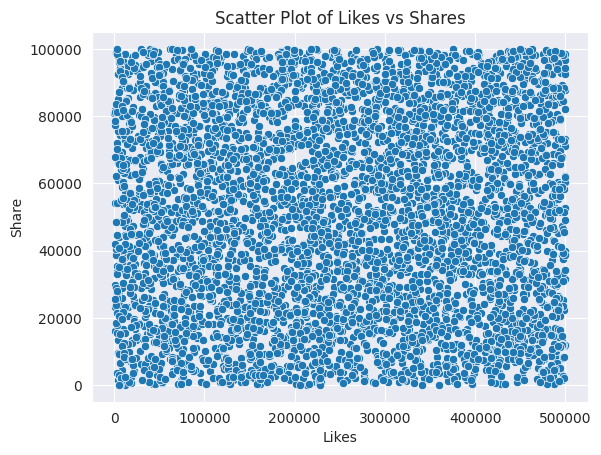

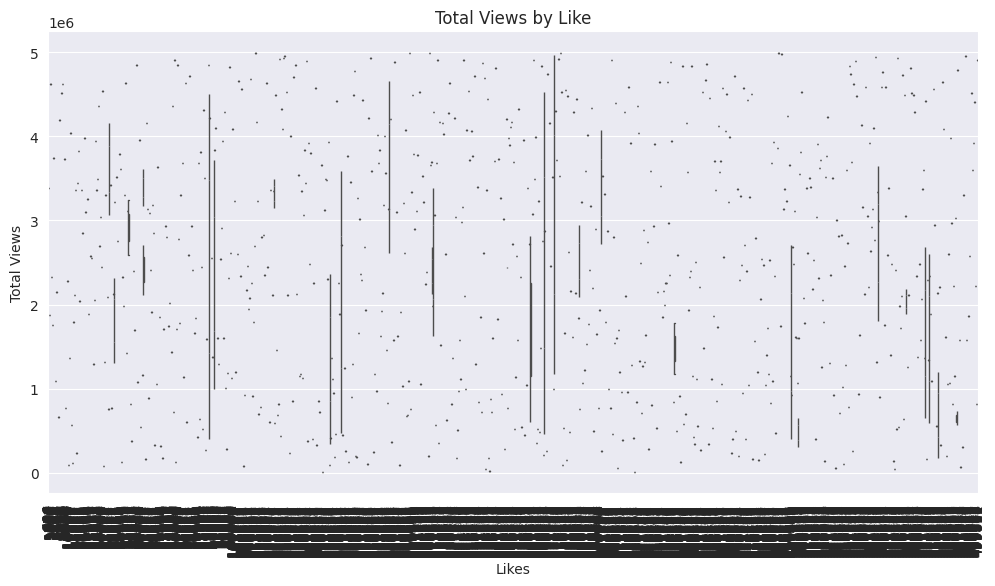

In [ ]:
#Scatter Plot
sns.scatterplot(x='Likes', y='Shares', data=df)
plt.title('Scatter Plot of Likes vs Shares')
plt.xlabel('Likes')
plt.ylabel('Share')
plt.show()


# Box Plot: Total Views by Hashtag
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Likes"], y=df["Views"], color="red")
plt.xticks(rotation=90)
plt.title("Total Views by Like")
plt.xlabel("Likes")
plt.ylabel("Total Views")
plt.show()


Multivariate Analysis

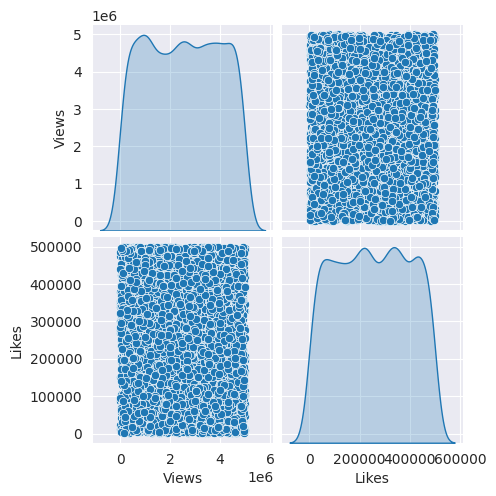

<ipython-input-161-4951ff04a729>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Region"], y=df["Views"], palette="Set2")


  Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4  Post_5     TikTok      #Dance         Post     Brazil    64866  171361   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium  
             Views     Likes    Shares  Comments
Views     1.000000 -0.003177  0.013144 -0.009956
Likes    -0.003177  1.000000  0.011154 -0.011772
Shares    0.013144  0.011154  1.000000 -0.000132
Comments -0.009956 -0.011772 -0.000132  1.000000


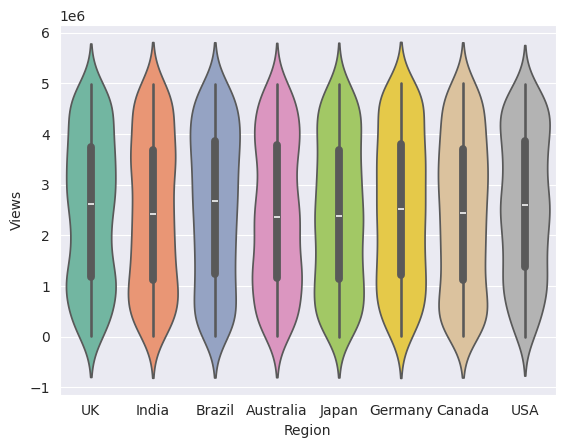

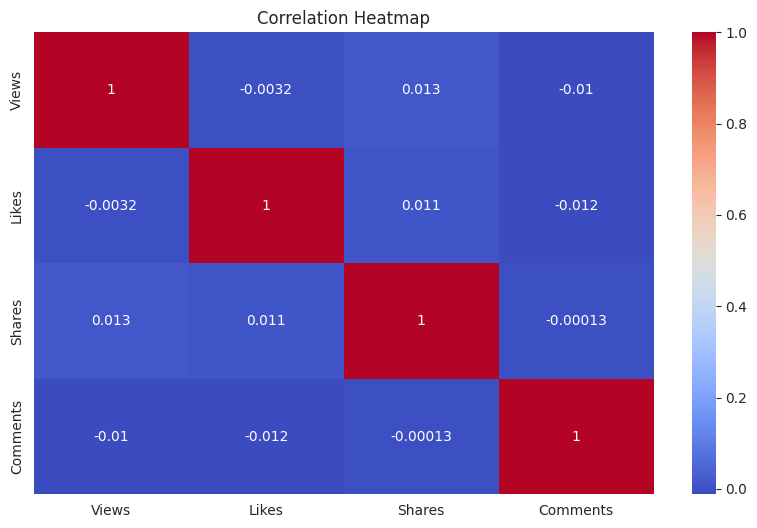

In [ ]:
#Pair Plot
sns.set_style("darkgrid");
sns.pairplot(df[["Views", "Likes"]], diag_kind="kde")
plt.show()

#Violin Plot
sns.violinplot(x=df["Region"], y=df["Views"], palette="Set2")


# Heatmap
print(df.head())
df = df.select_dtypes(include=['float64', 'int64'])
print(df.corr())
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Task 2. Data Preprocessing

## Null Values

In [ ]:
#Checking for Null values
print("Null Values:")
print(df.isnull().sum())

#Replace the Null values
df = df.dropna()
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

#Total count of null values after removing the null values
print("After Removing Null Values:")
print(df.isnull().sum())



Null Values:
Views       0
Likes       0
Shares      0
Comments    0
dtype: int64
After Removing Null Values:
Views       0
Likes       0
Shares      0
Comments    0
dtype: int64


## Skewness

Views       int64
Likes       int64
Shares      int64
Comments    int64
dtype: object
     Views   Likes  Shares  Comments
0  4163464  339431   53135     19346
1  4155940  215240   65860     27239
2  3666211  327143   39423     36223
3   917951  127125   11687     36806
4    64866  171361   69581      6376
Skewness of each numerical column:
 Views       0.000082
Likes      -0.012299
Shares     -0.020224
Comments   -0.002192
dtype: float64


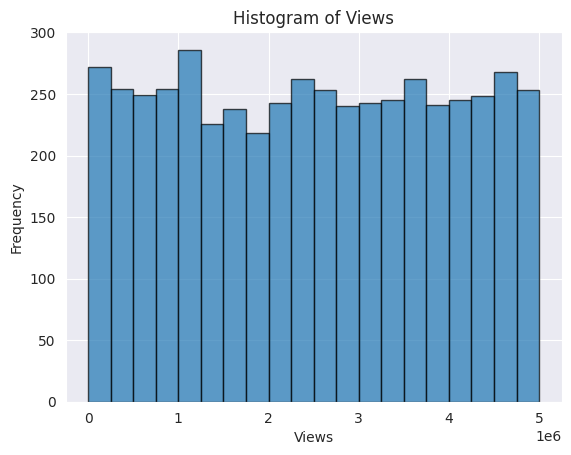

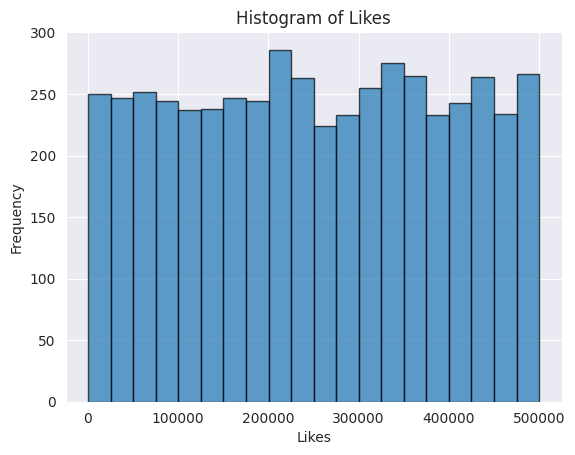

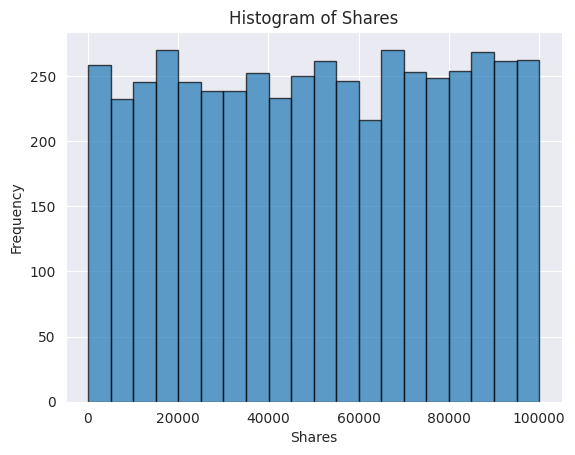

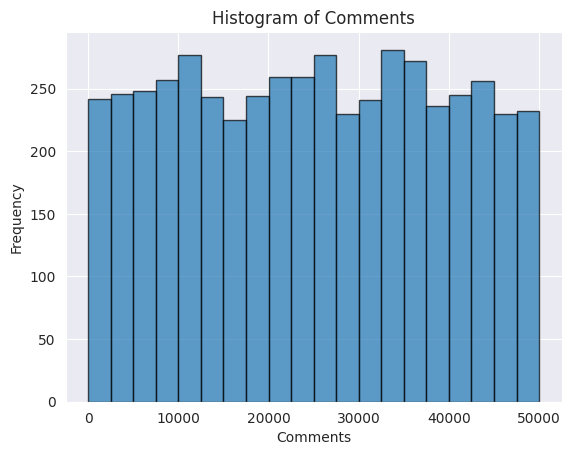

In [ ]:
#Checking for numerical columns
print(df.dtypes)

#To ensure only numerical columns remain
df_numeric = df.select_dtypes(include=['float64', 'int64'])
print(df_numeric.head())

skewness = df.skew()
print("Skewness of each numerical column:\n", skewness)

#Visualizing Skewness using Histogram
for column in df_numeric.columns:
    plt.hist(df_numeric[column], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Blox Plot

<ipython-input-69-ff581027d338>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df["Likes"], palette="Set2")


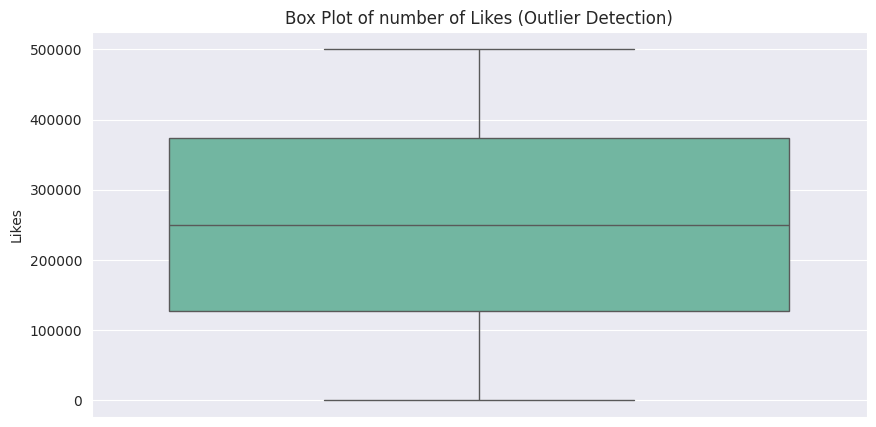

In [ ]:


# Boxplot for detecting outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df["Likes"], palette="Set2")
plt.xticks(rotation=45)
plt.title("Box Plot of number of Likes (Outlier Detection)")
plt.show()



# Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
columns_to_scale = ['Likes', 'Shares', 'Comments']
df_numeric = df[columns_to_scale]
print(df_numeric.head())

# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
df_scaled_standard = pd.DataFrame(scaled_data, columns=columns_to_scale)
print("Standard Scaled Data:\n", df_scaled_standard.head())

# Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_numeric)
df_scaled_minmax = pd.DataFrame(scaled_data, columns=columns_to_scale)
print("Min-Max Scaled Data:\n", df_scaled_minmax.head())

#Combined Scaled Data with original data
df[columns_to_scale] = scaled_data
print(df.head())

      Likes    Shares  Comments
0  0.678653  0.531223  0.386753
1  0.429988  0.658567  0.544692
2  0.654049  0.394002  0.724462
3  0.253558  0.116436  0.736128
4  0.342131  0.695805  0.127224
Standard Scaled Data:
       Likes    Shares  Comments
0  0.609387  0.089991 -0.388039
1 -0.251048  0.527826  0.164573
2  0.524252 -0.381805  0.793569
3 -0.861537 -1.336130  0.834387
4 -0.555056  0.655856 -1.296107
Min-Max Scaled Data:
       Likes    Shares  Comments
0  0.678653  0.531223  0.386753
1  0.429988  0.658567  0.544692
2  0.654049  0.394002  0.724462
3  0.253558  0.116436  0.736128
4  0.342131  0.695805  0.127224
     Views     Likes    Shares  Comments
0  4163464  0.678653  0.531223  0.386753
1  4155940  0.429988  0.658567  0.544692
2  3666211  0.654049  0.394002  0.724462
3   917951  0.253558  0.116436  0.736128
4    64866  0.342131  0.695805  0.127224


# Class Imbalance Issue for Catagorical Data

In [ ]:
# Checking class distribution in categorical columns
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts())



Value Counts for Post_ID:
 Post_ID
Post_5000    1
Post_1       1
Post_2       1
Post_3       1
Post_4       1
            ..
Post_13      1
Post_12      1
Post_11      1
Post_10      1
Post_9       1
Name: count, Length: 5000, dtype: int64

Value Counts for Platform:
 Platform
YouTube      1324
TikTok       1260
Instagram    1212
Twitter      1204
Name: count, dtype: int64

Value Counts for Hashtag:
 Hashtag
#Fitness      536
#Education    525
#Challenge    507
#Comedy       505
#Dance        496
#Music        493
#Tech         491
#Fashion      487
#Viral        481
#Gaming       479
Name: count, dtype: int64

Value Counts for Content_Type:
 Content_Type
Live Stream    855
Post           853
Reel           841
Tweet          836
Video          828
Shorts         787
Name: count, dtype: int64

Value Counts for Region:
 Region
USA          677
Canada       658
UK           647
Brazil       641
India        617
Australia    602
Japan        592
Germany      566
Name: count, dtype: int64

# Handle class imbalance with SMOTE.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Hashtag"])
y = df["Hashtag"]

#Convert 'Hashtag' to numerical using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split before applying SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only on training data
# Calculate k_neighbors based on the minimum class count
k_neighbors = min(y_train.value_counts().min() - 1, 5)  # Ensure k_neighbors <= n_samples - 1

# If k_neighbors is 0 or negative, set it to 1
k_neighbors = max(1, k_neighbors)

smote = SMOTE(random_state=42, k_neighbors=k_neighbors)  # Use the calculated k_neighbors
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class Distribution Before SMOTE:\n", y_train.value_counts())
print("Class Distribution After SMOTE:\n", y_train_smote.value_counts())

Class Distribution Before SMOTE:
 Hashtag
#Fitness      429
#Education    420
#Challenge    405
#Comedy       404
#Dance        397
#Music        394
#Tech         393
#Fashion      390
#Viral        385
#Gaming       383
Name: count, dtype: int64
Class Distribution After SMOTE:
 Hashtag
#Gaming       429
#Tech         429
#Dance        429
#Fashion      429
#Music        429
#Viral        429
#Fitness      429
#Challenge    429
#Education    429
#Comedy       429
Name: count, dtype: int64


## Splitting dataset into train and test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Size:", X_train.shape, "Test Set Size:", X_test.shape)


Training Set Size: (4000, 9) Test Set Size: (1000, 9)


# Task 3. Fit to ML model

In [ ]:
# Prepare data (remove "Not Engaged" and preprocess as before)
X = df.drop(columns=["Platform", "Hashtag", "Content_Type", "Region", "Engagement_Level", "Post_ID"])

X = X.dropna()
y = df["Engagement_Level"].loc[X.index]
y = y.dropna()

# Remove the "Not Engaged" class from the target variable
X = X[y != 'Not Engaged']
y = y[y != 'Not Engaged']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE on training data
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Class Distribution After SMOTE:\n", pd.Series(y_train_smote).value_counts())


Class Distribution After SMOTE:
 Engagement_Level
High      1383
Low       1383
Medium    1383
Name: count, dtype: int64


## Train Three Machine learning models.

### Model 1.Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train_smote, y_train_smote)


# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Performance:
              precision    recall  f1-score   support

        High       0.36      0.20      0.26       335
         Low       0.34      0.42      0.38       346
      Medium       0.34      0.40      0.36       319

    accuracy                           0.34      1000
   macro avg       0.35      0.34      0.33      1000
weighted avg       0.35      0.34      0.33      1000



### Model 2: Random Forest

In [ ]:
# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

        High       0.31      0.33      0.32       335
         Low       0.34      0.35      0.34       346
      Medium       0.35      0.32      0.33       319

    accuracy                           0.33      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.33      0.33      0.33      1000



In [ ]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate Random Forest model
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.35
              precision    recall  f1-score   support

        High       0.34      0.38      0.36       335
         Low       0.35      0.38      0.36       346
      Medium       0.37      0.29      0.33       319

    accuracy                           0.35      1000
   macro avg       0.35      0.35      0.35      1000
weighted avg       0.35      0.35      0.35      1000



Model 3: Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate model
print("Gradient Boosting Classifier Performance:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier Performance:
              precision    recall  f1-score   support

        High       0.32      0.34      0.33       335
         Low       0.32      0.34      0.33       346
      Medium       0.37      0.32      0.34       319

    accuracy                           0.33      1000
   macro avg       0.34      0.33      0.33      1000
weighted avg       0.34      0.33      0.33      1000



### Ensemble Model

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('gb', gb)
], voting='hard')

ensemble.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_ensemble = ensemble.predict(X_test)

# Evaluate ensemble model
print("Ensemble Model Performance:")
print(classification_report(y_test, y_pred_ensemble))


Ensemble Model Performance:
              precision    recall  f1-score   support

        High       0.31      0.39      0.35       335
         Low       0.34      0.33      0.33       346
      Medium       0.34      0.27      0.30       319

    accuracy                           0.33      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.33      0.33      0.33      1000



### Artificial Neural Network (ANN)

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Keep X_train_smote as a DataFrame for select_dtypes
X_train_smote_df = X_train_smote.copy()

# Convert X_train_smote_df to DataFrame if it's not
if not isinstance(X_train_smote_df, pd.DataFrame):
    X_train_smote_df = pd.DataFrame(X_train_smote_df)

# Convert all object columns to numeric in the DataFrame copy
for col in X_train_smote_df.select_dtypes(include=['object']).columns:
    X_train_smote_df[col] = pd.to_numeric(X_train_smote_df[col], errors='coerce').fillna(0).astype(int)

# Convert y_train_smote to numeric using Label Encoding
le = LabelEncoder()
y_train_smote_encoded = le.fit_transform(y_train_smote)

# Convert y_test to numeric using the same Label Encoding
y_test_encoded = le.transform(y_test)

# Convert the DataFrame copy to a NumPy array for the model
X_train_smote = X_train_smote_df.values
num_classes = len(np.unique(y_train_smote_encoded))

# If multi-class, use one-hot encoding
if num_classes > 2:
    y_train_smote_encoded = to_categorical(y_train_smote_encoded, num_classes=num_classes)

# Define the ANN model
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1 if num_classes == 2 else num_classes, activation='sigmoid' if num_classes == 2 else 'softmax')
])

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy' if num_classes == 2 else 'categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann.fit(X_train_smote, y_train_smote_encoded, epochs=50, batch_size=32, verbose=1)

# Predict
y_pred_probs = ann.predict(X_test)

# Convert probabilities to class labels
if num_classes == 2:
    y_pred_ann = (y_pred_probs > 0.5).astype(int)
else:
    y_pred_ann = np.argmax(y_pred_probs, axis=1)

# Evaluate performance
from sklearn.metrics import classification_report
print("Artificial Neural Network Performance:")
print(classification_report(y_test_encoded, y_pred_ann))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3542 - loss: 20085.5176
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3417 - loss: 3577.6169
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3402 - loss: 3924.9783
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3345 - loss: 5458.9292
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3435 - loss: 6509.7368
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3377 - loss: 3800.6431
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3386 - loss: 5072.3423
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3439 - loss: 5427.7363
Epoch 9/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3312 - loss: 6602.0269
Epoch 10/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3538 - loss: 4304.2349
Epoch 11/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3546 - loss: 3345.3647
Epoch 12/50
130/130 ━━━━━━━━━

# Task 4. Evaluation

### Evaluation on Machine Learning Models.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Drop irrelevant columns
X = df.drop(columns=["Platform", "Hashtag", "Content_Type", "Region", "Engagement_Level", "Post_ID"])

X = X.dropna()
y = df["Engagement_Level"].loc[X.index]

# Remove 'Not Engaged' class
valid_indices = y[y != 'Not Engaged'].index
X = X.loc[valid_indices]
y = y.loc[valid_indices]

# Drop any remaining NaNs
y = y.dropna()
X = X.loc[y.index]

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print(y_train_smote.value_counts())


Engagement_Level
High      1383
Low       1383
Medium    1383
Name: count, dtype: int64


### Model 1: Evaluation on Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_logreg = logreg.predict(X_test)


### Model 2: Evaluation on Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf = rf.predict(X_test)


### Model 3: Evaluation on Support Vector Machine (SVM)

In [ ]:
svm = SVC(random_state=42, probability=True)
svm.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_svm = svm.predict(X_test)


### Model 4: Evaluation on Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_gb = gb.predict(X_test)


### Model 5: Evaluation on Ensemble Model

In [ ]:
ensemble = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('svm', svm)
], voting='hard')

ensemble.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_ensemble = ensemble.predict(X_test)


### Model 6: Evaluation on ANN

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Keep X_train_smote as a DataFrame for select_dtypes
X_train_smote_df = X_train_smote.copy()

# Convert X_train_smote_df to DataFrame if it's not
if not isinstance(X_train_smote_df, pd.DataFrame):
    X_train_smote_df = pd.DataFrame(X_train_smote_df)

# Convert all object columns to numeric in the DataFrame copy
for col in X_train_smote_df.select_dtypes(include=['object']).columns:
    X_train_smote_df[col] = pd.to_numeric(X_train_smote_df[col], errors='coerce').fillna(0).astype(int)

# Convert y_train_smote to numeric using Label Encoding
le = LabelEncoder()
y_train_smote_encoded = le.fit_transform(y_train_smote)

# Convert y_test to numeric using the same Label Encoding
y_test_encoded = le.transform(y_test)

# Convert the DataFrame copy to a NumPy array for the model
X_train_smote = X_train_smote_df.values
num_classes = len(np.unique(y_train_smote_encoded))

# If multi-class, use one-hot encoding
if num_classes > 2:
    y_train_smote_encoded = to_categorical(y_train_smote_encoded, num_classes=num_classes)

# Define the ANN model
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1 if num_classes == 2 else num_classes, activation='sigmoid' if num_classes == 2 else 'softmax')
])

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy' if num_classes == 2 else 'categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann.fit(X_train_smote, y_train_smote_encoded, epochs=50, batch_size=32, verbose=1)

# Predict
y_pred_probs = ann.predict(X_test)

# Convert probabilities to class labels
if num_classes == 2:
    y_pred_ann = (y_pred_probs > 0.5).astype(int)
else:
    y_pred_ann = np.argmax(y_pred_probs, axis=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3407 - loss: 20037.9023
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3416 - loss: 9298.1240
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3408 - loss: 11012.7559
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3241 - loss: 6712.3066
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3259 - loss: 6796.7515
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3196 - loss: 8732.0732
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3483 - loss: 4760.8413
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3392 - loss: 10757.5781
Epoch 9/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3379 - loss: 6810.9194
Epoch 10/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3373 - loss: 7074.7217
Epoch 11/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3342 - loss: 5338.0430
Epoch 12/50
130/130 ━━━━━━━

### confusion matrix (F1, Accuracy, Precision, Recall, AUC ROC curves)


ANN Confusion Matrix:


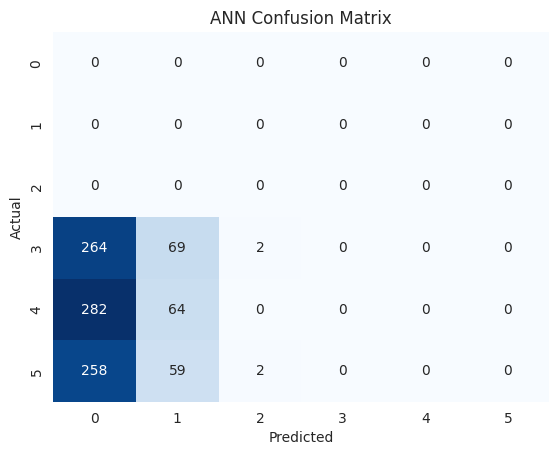

ANN Accuracy: 0.00

ANN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
        High       0.00      0.00      0.00     335.0
         Low       0.00      0.00      0.00     346.0
      Medium       0.00      0.00      0.00     319.0

    accuracy                           0.00    1000.0
   macro avg       0.00      0.00      0.00    1000.0
weighted avg       0.00      0.00      0.00    1000.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object outside the function (or within, as a global variable)
le = LabelEncoder()

def evaluate_model(y_true, y_pred, model_name, model=None, X_test=None):

    # Convert all unique labels to strings before fitting
    all_unique_labels = pd.concat([pd.Series(y_true), pd.Series(y_pred)]).unique().astype(str)
    le.fit(all_unique_labels)

    # Transform y_true and y_pred to numeric using the fitted LabelEncoder
    y_true_encoded = le.transform(y_true.astype(str))
    y_pred_encoded = le.transform(y_pred.astype(str))

    # Step 2: Plot Confusion Matrix
    cm = confusion_matrix(y_true_encoded, y_pred_encoded)
    print(f"\n{model_name} Confusion Matrix:")
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Step 3: Calculate and Print Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

    # Step 4: Print Precision, Recall, and F1-Score
    print(f"\n{model_name} Classification Report:")

    # ----> Inverse transform y_pred to original labels for the classification report
    y_pred_original_labels = le.inverse_transform(y_pred)
    print(classification_report(y_true, y_pred_original_labels))

    # Step 5: AUC-ROC Curve (only for binary classification and models with predict_proba method)
    if model is not None and hasattr(model, "predict_proba") and X_test is not None:
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_true, y_prob)  # Ensure y_true is binary for ROC curve
        roc_auc = auc(fpr, tpr)
        print(f"{model_name} AUC-ROC: {roc_auc:.2f}")

        # Plot ROC Curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random model)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend(loc='lower right')
        plt.show()


# Example of how to use the evaluate_model function for a model (e.g., ANN, Logistic Regression)
evaluate_model(y_test, y_pred_ann, "ANN", model=ann, X_test=X_test)  # Use y_test and y_pred_ann for your predictions

## For regression, find MSE, MAE, RMSE, R-squared (R²) Scores.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# LabelEncoder object
le = LabelEncoder()

# Convert all unique labels to strings before fitting
# Convert y_train and y_test to Series before concatenation
all_unique_labels = pd.concat([pd.Series(y_train), pd.Series(y_test)]).unique().astype(str)
le.fit(all_unique_labels)

# Transform your training target variable using the same encoder
y_train_encoded = le.transform(pd.Series(y_train).astype(str))

# Transform your test target variable using the same encoder
y_test_encoded = le.transform(pd.Series(y_test).astype(str))


# Initialize and train the model
reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train, y_train_encoded)  # Use encoded y_train

# Make predictions on the test set
y_pred_reg = reg_model.predict(X_test)

# Calculate MSE, MAE, RMSE, and R² scores
mse = mean_squared_error(y_test_encoded, y_pred_reg) # Use encoded y_test
mae = mean_absolute_error(y_test_encoded, y_pred_reg) # Use encoded y_test
rmse = np.sqrt(mse)
r2 = r2_score(y_test_encoded, y_pred_reg) # Use encoded y_test

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.6801450000000001
Mean Absolute Error (MAE): 0.7155
Root Mean Squared Error (RMSE): 0.8247090396012403
R-squared (R²): -0.041410197519522685


## Making a Performance comparison table

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Modified get_metrics function
def get_metrics(y_true, y_pred, model_name):
    # Convert to numeric if needed
    y_true = y_true.astype(str)
    # Convert y_pred to NumPy array before applying astype
    y_pred = np.array(y_pred).astype(str)

    # Ensure y_true and y_pred have the same length
    min_len = min(len(y_true), len(y_pred))
    y_true = y_true[:min_len]
    y_pred = y_pred[:min_len]

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)

    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

    # Handle case for AUC-ROC when only one class is predicted
    try:
        y_true_numeric = pd.factorize(y_true)[0]
        y_pred_numeric = pd.factorize(y_pred)[0]
        auc = roc_auc_score(y_true_numeric, y_pred_numeric, multi_class='ovr', average='weighted')
    except ValueError:  # Handle case when there's only one class
        auc = None  # Set AUC as None if calculation fails

    return [model_name, accuracy, precision, recall, f1, auc]

models = [
    ("Logistic Regression", y_pred_logreg, logreg),
    ("Random Forest", y_pred_rf, rf),
    ("SVM", y_pred_svm, svm),
    ("Gradient Boosting", y_pred_gb, gb),
    ("Ensemble", y_pred_ensemble, ensemble),
    ("ANN", y_pred_ann, ann),
]

# Create an empty list to store metrics
metrics_list = []

# Evaluate each model
for model_name, y_pred, model in models:
    metrics = get_metrics(y_test, y_pred, model_name)
    metrics_list.append(metrics)

# Convert metrics to a DataFrame for easy viewing
metrics_df = pd.DataFrame(metrics_list, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"])

# Display the comparison table
print(metrics_df)

                 Model  Accuracy  Precision  Recall  F1-Score AUC-ROC
0  Logistic Regression       0.0   1.000000     0.0  0.000000    None
1        Random Forest       0.0   1.000000     0.0  0.000000    None
2                  SVM       0.0   1.000000     0.0  0.000000    None
3    Gradient Boosting       0.0   1.000000     0.0  0.000000    None
4             Ensemble       0.0   1.000000     0.0  0.000000    None
5                  ANN       0.3   0.305205     0.3  0.300089    None


### Evaluation on different Hyperparameters

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import StratifiedKFold, GridSearchCV

X, y = np.random.rand(500, 10), np.random.randint(0, 3, 500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter Grid
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [10, 15]}
param_grid_gb = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}

# Cross-validation
# Import StratifiedKFold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Random Forest
rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=cv, scoring='f1_weighted', n_jobs=-1)
rf.fit(X_train, y_train_enc)
print("Best RF Params:", rf.best_params_)
print("RF Report:\n", classification_report(y_test_enc, rf.best_estimator_.predict(X_test)))

# Gradient Boosting
gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=cv, scoring='f1_weighted', n_jobs=-1)
gb.fit(X_train, y_train_enc)
print("Best GB Params:", gb.best_params_)
print("GB Report:\n", classification_report(y_test_enc, gb.best_estimator_.predict(X_test)))

# ANN Model
num_classes = len(np.unique(y_train_enc))
y_train_enc = to_categorical(y_train_enc, num_classes) if num_classes > 2 else y_train_enc

ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')
])

ann.compile(optimizer='adam', loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train_enc, epochs=50, batch_size=32, verbose=1)

y_pred_ann_probs = ann.predict(X_test)
y_pred_ann = np.argmax(y_pred_ann_probs, axis=1) if num_classes > 2 else (y_pred_ann_probs > 0.5).astype(int)
print("ANN Report:\n", classification_report(y_test_enc, y_pred_ann))

Best RF Params: {'max_depth': 10, 'n_estimators': 50}
RF Report:
               precision    recall  f1-score   support

           0       0.38      0.30      0.33        40
           1       0.28      0.30      0.29        33
           2       0.28      0.33      0.31        27

    accuracy                           0.31       100
   macro avg       0.31      0.31      0.31       100
weighted avg       0.32      0.31      0.31       100

Best GB Params: {'learning_rate': 0.01, 'n_estimators': 100}
GB Report:
               precision    recall  f1-score   support

           0       0.47      0.23      0.31        40
           1       0.31      0.52      0.39        33
           2       0.33      0.33      0.33        27

    accuracy                           0.35       100
   macro avg       0.37      0.36      0.34       100
weighted avg       0.38      0.35      0.34       100



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3315 - loss: 1.1046
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4072 - loss: 1.0710 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4021 - loss: 1.0762 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4265 - loss: 1.0584 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4774 - loss: 1.0410
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5067 - loss: 1.0222 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5204 - loss: 1.0112 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5203 - loss: 1.0044
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5467 - loss: 0.9899
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5610 - loss: 0.9917  
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5564 - loss: 0.9794 
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: